<div style="margin-left: 220px;"><h1>Detecting Authenticity of Visual Media</h1></div>


<div style="margin-left: 350px;"><h2>Team Name: TrustLens</h2></div>

<div style="margin-left: 200px;"><h3>Team Members: Romika Govindarajulu Sairam & Lakshya Pitti</h3></div>

## Data Preparation

Do not run this cell, we've added it to show what we've done with the CG-1050 dataset. More information on this in the Data Preparation section of our report. 

In [1]:
import os

def find_new_name(original_name):
    base, ext = os.path.splitext(original_name)
    parts = base.split('_')
    if len(parts) > 2:  # Check if the pattern fits
        new_part = parts[-1] + parts[-2]  # Combine last two parts
        new_name = '_'.join(parts[:-2] + [new_part]) + ext
        return new_name
    return None

def process_files(original_dir, tampered_dir):
    original_files = os.listdir(original_dir)
    tampered_files = os.listdir(tampered_dir)
    valid_tampered_files = []

    # Mapping of new tampered file names back to original file names
    tampered_to_original = {}

    # Identify valid tampered files and map them back to their original names
    for original in original_files:
        new_name = find_new_name(original)
        if new_name and new_name in tampered_files:
            valid_tampered_files.append(new_name)
            tampered_to_original[new_name] = original

    # Rename files in tampered folder based on expected names from original
    for tampered in valid_tampered_files:
        original_name = tampered_to_original[tampered]
        os.rename(os.path.join(tampered_dir, tampered), os.path.join(tampered_dir, original_name))
        print(f"Renamed {tampered} to {original_name}")

    # Delete files in tampered folder that do not match the pattern
    for file in tampered_files:
        if file not in valid_tampered_files:
            os.remove(os.path.join(tampered_dir, file))

# Example usage
original_dir = 'archive/TRAINING/ORIGINAL'
tampered_dir = 'archive/TRAINING/TAMPERED'
process_files(original_dir, tampered_dir)

val_original_dir = 'archive/VALIDATION/ORIGINAL'
val_tampered_dir = 'archive/VALIDATION/TAMPERED'
process_files(val_original_dir, val_tampered_dir)


Renamed Im97_col3.jpg to Im97_3_col.jpg
Renamed Im19_r3.jpg to Im19_3_r.jpg
Renamed Im12_r4.jpg to Im12_4_r.jpg
Renamed Im3_r3.jpg to Im3_3_r.jpg
Renamed Im60_col2.jpg to Im60_2_col.jpg
Renamed Im24_col3.jpg to Im24_3_col.jpg
Renamed Im98_col4.jpg to Im98_4_col.jpg
Renamed Im30_col3.jpg to Im30_3_col.jpg
Renamed Im85_cm4.jpg to Im85_4_cm.jpg
Renamed Im74_col2.jpg to Im74_2_col.jpg
Renamed Im78_r2.jpg to Im78_2_r.jpg
Renamed Im60_r4.jpg to Im60_4_r.jpg
Renamed Im68_r2.jpg to Im68_2_r.jpg
Renamed Im83_col3.jpg to Im83_3_col.jpg
Renamed Im51_cm3.jpg to Im51_3_cm.jpg
Renamed Im70_col4.jpg to Im70_4_col.jpg
Renamed Im11_col3.jpg to Im11_3_col.jpg
Renamed Im55_col2.jpg to Im55_2_col.jpg
Renamed Im84_r4.jpg to Im84_4_r.jpg
Renamed Im25_r2.jpg to Im25_2_r.jpg
Renamed Im61_cm4.jpg to Im61_4_cm.jpg
Renamed Im5_col3.jpg to Im5_3_col.jpg
Renamed Im35_r2.jpg to Im35_2_r.jpg
Renamed Im26_r3.jpg to Im26_3_r.jpg
Renamed Im36_r3.jpg to Im36_3_r.jpg
Renamed Im44_r3.jpg to Im44_3_r.jpg
Renamed Im54_r3.jp

## Feature Extraction

## Harris Corner Detection
#### A guide to building this algorithm was found in this blog: https://www.baeldung.com/cs/harris-corner-detection

### Harris on TRAINING data

In [7]:
import cv2 as cv
import numpy as np
from scipy import signal
import cv2 as cv
import numpy as np
import os
from PIL import Image

orig_dir = 'archive/TRAINING/ORIGINAL'
tamp_dir = 'archive/TRAINING/TAMPERED'
dest_o = 'extracted/TRAINING/ORIGINAL'
dest_t = 'extracted/TRAINING/TAMPERED'

orig_files = os.listdir(orig_dir)
tamp_files = os.listdir(tamp_dir)

orb = cv.ORB_create()

for tamp_filename in tamp_files:
    orig_path = os.path.join(orig_dir, tamp_filename)
    tamp_path = os.path.join(tamp_dir, tamp_filename)

    orig_img = cv.imread(orig_path)
    orig_gray= cv.cvtColor(orig_img,cv.COLOR_BGR2GRAY)
    
    tamp_img = cv.imread(tamp_path)
    tamp_gray= cv.cvtColor(tamp_img,cv.COLOR_BGR2GRAY)

    # Step 1: Applying a filter and convolving
    
    # Sobel filter kernel: 
    # https://medium.com/@vaibhav1403/sobel-filter-prewitt-filter-and-the-laplacian-filter-d3b8995c13#:~:text=The%20Laplacian%20filter%20is%20used,Laplacian%20of%20the%20image%20intensity.
    Gx_o = np.array([[ -1,0,1], [-2,0,2], [-1,0,1]])
    Gy_o = np.array([[ -1,-2,-1], [0,0,0], [1,2,1]])
    
    # This function was found here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html
    Ix_o = signal.convolve2d(orig_gray, Gx_o, boundary='symm', mode='same')
    Iy_o = signal.convolve2d(orig_gray, Gy_o, boundary='symm', mode='same')

    Gx_t = np.array([[ -1,0,1], [-2,0,2], [-1,0,1]])
    Gy_t = np.array([[ -1,-2,-1], [0,0,0], [1,2,1]])
    
    Ix_t = signal.convolve2d(tamp_gray, Gx_t, boundary='symm', mode='same')
    Iy_t = signal.convolve2d(tamp_gray, Gy_t, boundary='symm', mode='same')
    
    # Step 2: Compute Gradients
    Ix2_o = Ix_o * Ix_o
    Iy2_o = Iy_o * Iy_o
    Ixy_o = Ix_o * Iy_o
    
    Ix2_t = Ix_t * Ix_t
    Iy2_t = Iy_t * Iy_t
    Ixy_t = Ix_t * Iy_t
    
    # Step 3: Applying a filter and convolving for the new gradients: 

    # Gaussian filter kernel: 
    # https://medium.com/@vaibhav1403/sobel-filter-prewitt-filter-and-the-laplacian-filter-d3
    gauss = np.array([[ 1,2,1], [2,4,2], [1,2,1]])
    scale_gauss = gauss/16

    Ix2_o = signal.convolve2d(Ix2_o, scale_gauss, boundary='fill', mode='same')
    Iy2_o = signal.convolve2d(Iy2_o, scale_gauss, boundary='fill', mode='same')
    Ixy2_o = signal.convolve2d(Ixy_o, scale_gauss, boundary='fill', mode='same')
    
    Ix2_t = signal.convolve2d(Ix2_t, scale_gauss, boundary='fill', mode='same')
    Iy2_t = signal.convolve2d(Iy2_t, scale_gauss, boundary='fill', mode='same')
    Ixy2_t = signal.convolve2d(Ixy_t, scale_gauss, boundary='fill', mode='same')

    
    # Compute Response function: R = det(M) - k * trace(M)^2
    # K = 0.05
    first_o = Ix2_o * Iy2_o
    second_o = Ixy2_o * Ixy2_o
    det_o = first_o - second_o
    trace_o = Ix2_o + Iy2_o
    trace2_o = trace_o * trace_o
    mult_o = 0.05 * trace2_o
    R_o = det_o - mult_o
    
    first_t = Ix2_t * Iy2_t
    second_t = Ixy2_t * Ixy2_t
    det_t = first_t - second_t
    trace_t = Ix2_t + Iy2_t
    trace2_t = trace_t * trace_t
    mult_t = 0.05 * trace2_t
    R_t = det_t - mult_t
    
    shapes_o = R_o.shape
    Rrows_o = shapes_o[0]
    Rcols_o = shapes_o[1]
    
    shapes_t = R_t.shape
    Rrows_t = shapes_t[0]
    Rcols_t = shapes_t[1]
    
    # Finding threshold by finding the max value in the matrices.
    R2_o = np.zeros((Rrows_o,Rcols_o))
    threshold_o = R_o.max()/100
    
    R2_t = np.zeros((Rrows_t,Rcols_t))
    threshold_t = R_t.max()/100
    
    kp_o = []
    kp_t = []
    
    # Computing keypoints
    for i in range(Rrows_o):
        for j in range(Rcols_o): 
            if R_o[i, j] > threshold_o:
                R2_o[i, j] = 1
                kp_o.append((i,j))
            else:
                R2_o[i, j] = 0
            
    
    for i in range(Rrows_t):
        for j in range(Rcols_t): 
            if R_t[i, j] > threshold_t:
                R2_t[i, j] = 1
                kp_t.append((i,j))
            else:
                R2_t[i, j] = 0
                
    kps_o = []
    kps_t = []
    
    # Computed keypoints are changed to keypoint object
    # Reference: https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/class_cv_KeyPoint.html
    for elem in kp_o:
        kp5 = cv.KeyPoint(x=elem[1], y=elem[0], size=1)
        kps_o.append(kp5)
    
    for elem in kp_t:
        kp6 = cv.KeyPoint(x=float(elem[1]), y=float(elem[0]), size=1)
        kps_t.append(kp6)
    
    # Using ORB to compute descriptors
    # Reference: https://docs.opencv.org/4.x/d1/d89/tutorial_py_orb.html
    kp7, desc_o = orb.compute(orig_gray, kps_o)
    kp8, desc_t = orb.compute(tamp_gray, kps_t)
    
    if desc_o is None or desc_t is None:
        print("None type image (original) " + str(orig_path))
        print("None type image (tampered) " + str(tamp_path))
        continue
        
    else:
        # Using Brute Force Matcher with NORM_HAMMING for Feature Matching.
        # Reference: https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html
        
        matcher = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
        matches = matcher.match(desc_o, desc_t)

        matches = sorted(matches, key=lambda x: x.distance)

        if len(matches) > 1000:
            cv.imwrite(os.path.join(dest_o, tamp_filename), orig_gray)
            cv.imwrite(os.path.join(dest_t, tamp_filename), tamp_gray)

None type image (original) archive/TRAINING/ORIGINAL/Im71_2_cm.jpg
None type image (tampered) archive/TRAINING/TAMPERED/Im71_2_cm.jpg
None type image (original) archive/TRAINING/ORIGINAL/Im85_2_r.jpg
None type image (tampered) archive/TRAINING/TAMPERED/Im85_2_r.jpg
None type image (original) archive/TRAINING/ORIGINAL/Im88_2_cm.jpg
None type image (tampered) archive/TRAINING/TAMPERED/Im88_2_cm.jpg
None type image (original) archive/TRAINING/ORIGINAL/Im57_4_r.jpg
None type image (tampered) archive/TRAINING/TAMPERED/Im57_4_r.jpg
None type image (original) archive/TRAINING/ORIGINAL/Im96_3_cm.jpg
None type image (tampered) archive/TRAINING/TAMPERED/Im96_3_cm.jpg
None type image (original) archive/TRAINING/ORIGINAL/Im82_2_cm.jpg
None type image (tampered) archive/TRAINING/TAMPERED/Im82_2_cm.jpg
None type image (original) archive/TRAINING/ORIGINAL/Im90_3_cm.jpg
None type image (tampered) archive/TRAINING/TAMPERED/Im90_3_cm.jpg
None type image (original) archive/TRAINING/ORIGINAL/Im99_2_cm.jpg

Corrupt JPEG data: premature end of data segment


### Harris on VALIDATION data

In [11]:
import cv2 as cv
import numpy as np
from scipy import signal
import cv2 as cv
import numpy as np
import os
from PIL import Image

orig_dir_val = 'archive/VALIDATION/ORIGINAL'
tamp_dir_val = 'archive/VALIDATION/TAMPERED'
dest_o_val = 'extracted/VALIDATION/ORIGINAL'
dest_t_val = 'extracted/VALIDATION/TAMPERED'

orig_files_val = os.listdir(orig_dir_val)
tamp_files_val = os.listdir(tamp_dir_val)

orb = cv.ORB_create()

for tamp_filename in tamp_files_val:
    orig_path_val = os.path.join(orig_dir_val, tamp_filename)
    tamp_path_val = os.path.join(tamp_dir_val, tamp_filename)

    orig_img_val = cv.imread(orig_path_val)
    orig_gray_val= cv.cvtColor(orig_img_val,cv.COLOR_BGR2GRAY)
    
    tamp_img_val = cv.imread(tamp_path_val)
    tamp_gray_val= cv.cvtColor(tamp_img_val,cv.COLOR_BGR2GRAY)

    # Step 1: Applying a filter and convolving
    
    # Sobel filter kernel: 
    # https://medium.com/@vaibhav1403/sobel-filter-prewitt-filter-and-the-laplacian-filter-d3b8995c13#:~:text=The%20Laplacian%20filter%20is%20used,Laplacian%20of%20the%20image%20intensity.
    Gx_o_val = np.array([[ -1,0,1], [-2,0,2], [-1,0,1]])
    Gy_o_val = np.array([[ -1,-2,-1], [0,0,0], [1,2,1]])
    
    # This function was found here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html
    Ix_o_val = signal.convolve2d(orig_gray_val, Gx_o_val, boundary='symm', mode='same')
    Iy_o_val = signal.convolve2d(orig_gray_val, Gy_o_val, boundary='symm', mode='same')

    Gx_t_val = np.array([[ -1,0,1], [-2,0,2], [-1,0,1]])
    Gy_t_val = np.array([[ -1,-2,-1], [0,0,0], [1,2,1]])
    
    Ix_t_val = signal.convolve2d(tamp_gray_val, Gx_t_val, boundary='symm', mode='same')
    Iy_t_val = signal.convolve2d(tamp_gray_val, Gy_t_val, boundary='symm', mode='same')
    
    # Step 2: Compute Gradients
    Ix2_o_val = Ix_o_val * Ix_o_val
    Iy2_o_val = Iy_o_val * Iy_o_val
    Ixy_o_val = Ix_o_val * Iy_o_val
    
    Ix2_t_val = Ix_t_val * Ix_t_val
    Iy2_t_val = Iy_t_val * Iy_t_val
    Ixy_t_val = Ix_t_val * Iy_t_val
    
    # Step 3: Applying a filter and convolving for the new gradients: 

    # Gaussian filter kernel: 
    # https://medium.com/@vaibhav1403/sobel-filter-prewitt-filter-and-the-laplacian-filter-d3
    gauss = np.array([[ 1,2,1], [2,4,2], [1,2,1]])
    scale_gauss = gauss/16

    Ix2_o_val = signal.convolve2d(Ix2_o_val, scale_gauss, boundary='fill', mode='same')
    Iy2_o_val = signal.convolve2d(Iy2_o_val, scale_gauss, boundary='fill', mode='same')
    Ixy2_o_val = signal.convolve2d(Ixy_o_val, scale_gauss, boundary='fill', mode='same')
    
    Ix2_t_val = signal.convolve2d(Ix2_t_val, scale_gauss, boundary='fill', mode='same')
    Iy2_t_val = signal.convolve2d(Iy2_t_val, scale_gauss, boundary='fill', mode='same')
    Ixy2_t_val = signal.convolve2d(Ixy_t_val, scale_gauss, boundary='fill', mode='same')

    
    # Compute Response function: R = det(M) - k * trace(M)^2
    # K = 0.05
    first_o_val = Ix2_o_val * Iy2_o_val
    second_o_val = Ixy2_o_val * Ixy2_o_val
    det_o_val = first_o_val - second_o_val
    trace_o_val = Ix2_o_val + Iy2_o_val
    trace2_o_val = trace_o_val * trace_o_val
    mult_o_val = 0.05 * trace2_o_val
    R_o_val = det_o_val - mult_o_val
    
    first_t_val = Ix2_t_val * Iy2_t_val
    second_t_val = Ixy2_t_val * Ixy2_t_val
    det_t_val = first_t_val - second_t_val
    trace_t_val = Ix2_t_val + Iy2_t_val
    trace2_t_val = trace_t_val * trace_t_val
    mult_t_val = 0.05 * trace2_t_val
    R_t_val = det_t_val - mult_t_val
    
    shapes_o_val = R_o_val.shape
    Rrows_o_val = shapes_o_val[0]
    Rcols_o_val = shapes_o_val[1]
    
    shapes_t_val = R_t_val.shape
    Rrows_t_val = shapes_t_val[0]
    Rcols_t_val = shapes_t_val[1]
    
    # Finding threshold by finding the max value in the matrices.
    R2_o_val = np.zeros((Rrows_o_val,Rcols_o_val))
    threshold_o_val = R_o_val.max()/100
    
    R2_t_val = np.zeros((Rrows_t_val,Rcols_t_val))
    threshold_t_val = R_t_val.max()/100
    
    kp_o_val = []
    kp_t_val = []
    
    # Computing keypoints
    for i in range(Rrows_o_val):
        for j in range(Rcols_o_val): 
            if R_o_val[i, j] > threshold_o_val:
                R2_o_val[i, j] = 1
                kp_o_val.append((i,j))
            else:
                R2_o_val[i, j] = 0
            
    
    for i in range(Rrows_t_val):
        for j in range(Rcols_t_val): 
            if R_t_val[i, j] > threshold_t_val:
                R2_t_val[i, j] = 1
                kp_t_val.append((i,j))
            else:
                R2_t_val[i, j] = 0
                
    kps_o_val = []
    kps_t_val = []
    
    # Computed keypoints are changed to keypoint object
    # Reference: https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/class_cv_KeyPoint.html
    for elem in kp_o_val:
        kp5_val = cv.KeyPoint(x=elem[1], y=elem[0], size=1)
        kps_o_val.append(kp5_val)
    
    for elem in kp_t_val:
        kp6_val = cv.KeyPoint(x=float(elem[1]), y=float(elem[0]), size=1)
        kps_t_val.append(kp6_val)
    
    # Using ORB to compute descriptors
    # Reference: https://docs.opencv.org/4.x/d1/d89/tutorial_py_orb.html
    kp7_val, desc_o_val = orb.compute(orig_gray_val, kps_o_val)
    kp8_val, desc_t_val = orb.compute(tamp_gray_val, kps_t_val)
    
    if desc_o_val is None or desc_t_val is None:
        print("None type image (original) " + str(orig_path_val))
        print("None type image (tampered) " + str(tamp_path_val))
        continue
        
    else:
        # Using Brute Force Matcher with NORM_HAMMING for Feature Matching.
        # Reference: https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html
        
        matcher = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
        matches = matcher.match(desc_o_val, desc_t_val)

        matches = sorted(matches, key=lambda x: x.distance)

        if len(matches) > 1000:
            cv.imwrite(os.path.join(dest_o_val, tamp_filename), orig_gray_val)
            cv.imwrite(os.path.join(dest_t_val, tamp_filename), tamp_gray_val)

None type image (original) archive/VALIDATION/ORIGINAL/Im66_1_cm.jpg
None type image (tampered) archive/VALIDATION/TAMPERED/Im66_1_cm.jpg
None type image (original) archive/VALIDATION/ORIGINAL/Im99_1_cm.jpg
None type image (tampered) archive/VALIDATION/TAMPERED/Im99_1_cm.jpg


## CNN model

### CNN Model on SIFT Data

In [106]:
import pandas as pd
import numpy as np
import keras 
import keras.models as M
import keras.layers as L
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from colorama import Fore as f
#import tensorflow_addons as tfa
#from tensorflow_addons.layers import InstanceNormalization as IN

img_shape=(120,120)
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen_valid=ImageDataGenerator()

training_data=datagen.flow_from_directory('extracted/TRAINING/',target_size=img_shape,color_mode='rgb',batch_size=20,seed=32,interpolation='bicubic')
validation_data=datagen_valid.flow_from_directory('extracted/VALIDATION/',target_size=img_shape,color_mode='rgb',batch_size=20,seed=32,interpolation='bicubic')
training_data.reset()
batch_images, batch_labels = next(training_data)  # Get one batch of data
datagen.fit(batch_images)

Found 346 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


In [107]:
def make_model():
    model = M.Sequential()
    model.add(L.Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (120, 120, 3)))
    model.add(L.Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (120, 120, 3)))
    model.add(L.MaxPool2D(pool_size = (2, 2)))
    model.add(L.Dropout(0.25))
    model.add(L.Flatten())
    model.add(L.Dense(256, activation = 'relu'))
    model.add(L.Dropout(0.5))
    model.add(L.Dense(2, activation = 'softmax'))
    return model

In [108]:
model=make_model()
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 116, 116, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 112, 112, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,718,946 (98.11 MB)

 Trainable params: 25,718,946 (98.11 MB)

 Non-trainable params: 0 (0.00 B)

In [111]:
from keras import optimizers
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate = 0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [112]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=4)
reduce_lr=keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',patience=2)
model.fit(training_data,validation_data=validation_data,epochs=25)

Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.4882 - loss: 0.6948 - val_accuracy: 0.5114 - val_loss: 0.9169
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5149 - loss: 0.6876 - val_accuracy: 0.5057 - val_loss: 1.5721
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.4945 - loss: 0.6852 - val_accuracy: 0.5057 - val_loss: 9.8788
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5353 - loss: 0.6799 - val_accuracy: 0.5170 - val_loss: 4.0584
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5622 - loss: 0.6839 - val_accuracy: 0.5511 - val_loss: 3.9363
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5098 - loss: 0.6823 - val_accuracy: 0.5341 - val_loss: 3.5204
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5694 - loss: 0.6829 - val_accuracy: 0.5682 - val_loss: 3.8282
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5477 - loss: 0.6744 - val_accuracy: 0.5284 - val_loss:

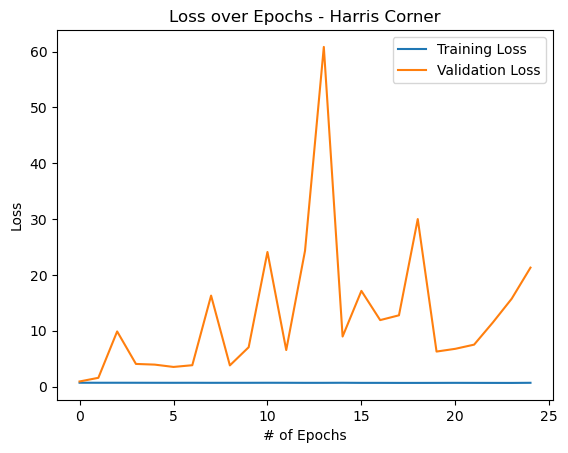

In [125]:
loss=model.history.history['loss']
val_loss=model.history.history['val_loss']
acc=model.history.history['accuracy']
val_acc=model.history.history['val_accuracy']
epochs=[i for i in range(len(loss))]
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.legend(["Training Loss", "Validation Loss"], loc="upper right")
plt.title('Loss over Epochs - Harris Corner')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.show();

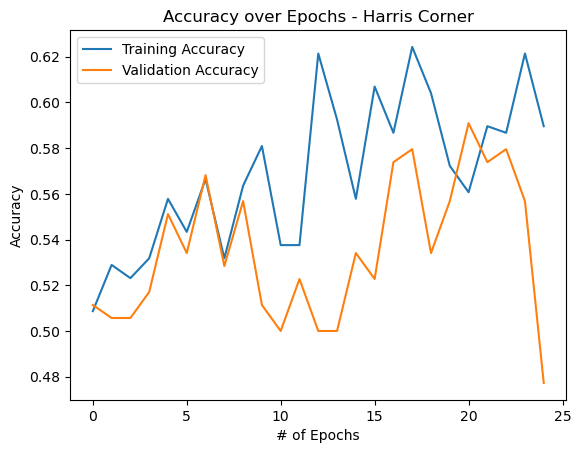

In [124]:
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.legend(["Training Accuracy", "Validation Accuracy"], loc="upper left")
plt.title('Accuracy over Epochs - Harris Corner')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.show();